In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

width = 5
height = width / 1.618

matplotlib.rcParams.update({
    'font.size': 12,
    'figure.figsize': (width, height),
    'figure.facecolor': 'white',
    'savefig.dpi': 72,
    'figure.subplot.bottom': 0.125,
    'figure.edgecolor': 'white',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})


In [18]:
@ticker.FuncFormatter
def worker_formatter(x, pos):
    x = str(int(x))
    return x

ADBO
```yaml
candle_combo-DBOS4M-async-RF-qUCB-qUCB-16-4-10800-42:
  best_objective: 0.92156720161438
  best_objective_timestamp: 4915.914201498032
  num_evaluations: 798
  num_workers: 64
  utilization: 0.9199005273860638
candle_combo-DBOS4M-async-RF-qUCB-qUCB-32-4-10800-42:
  best_objective: 0.9195117950439452
  best_objective_timestamp: 6600.05705332756
  num_evaluations: 1311
  num_workers: 128
  utilization: 0.8813475031528138
candle_combo-DBOS4M-async-RF-qUCB-qUCB-64-4-10800-42:
  best_objective: 0.9240437150001526
  best_objective_timestamp: 10232.75018811226
  num_evaluations: 2768
  num_workers: 256
  utilization: 0.9059626218304038
candle_combo-DBOS4M-async-RF-qUCB-qUCB-128-4-10800-42:
  best_objective: 0.9304808974266052
  best_objective_timestamp: 3031.7331886291504
  num_evaluations: 7291
  num_workers: 512
  utilization: 0.9537623694574857
candle_combo-DBOS4M-async-RF-qUCB-qUCB-256-4-10800-42:
  best_objective: 0.927851676940918
  best_objective_timestamp: 3014.950859069824
  num_evaluations: 12840
  num_workers: 1024
  utilization: 0.9275786316074448
```

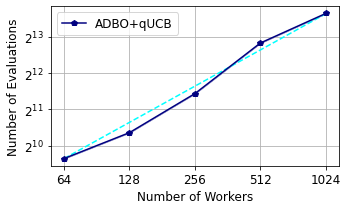

In [30]:
y = np.asarray([])
y = np.asarray([798, 1311, 2768, 7291, 12840])
y_err = np.asarray([0, 0, 0, 0, 0])

x = [(16*4)*(2**i) for i in range(len(y))]
y_linear = [y[0]*(2**i) for i in range(len(y))]

# y_base = np.asarray([1658, 3301, 6633, 13154, 25599, 49964])
# y_base_err = np.asarray([8, 41, 29, 170, 862, 847])
# y_base_linear = [y_base[0]*(2**i) for i in range(len(y))]

# print(np.mean([x1/x2 for x1, x2 in zip(y, y_base)]))

plt.figure()
# plt.plot(x, y_base_linear, color="plum", linestyle="--")
# plt.plot(x, y_base, marker="^", color="purple", label="SDBO+bUCB")
# plt.fill_between(x, y_base-y_base_err, y_base+y_base_err, color="purple", alpha=0.3)

plt.plot(x, y_linear, color="cyan", linestyle="--")
plt.plot(x, y, marker="p", color="navy", label="ADBO+qUCB")
plt.fill_between(x, y-y_err, y+y_err, color="navy", alpha=0.3)

plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.ylabel("Number of Evaluations")
plt.xlabel("Number of Workers")
ax = plt.gca()
ax.xaxis.set_major_formatter(worker_formatter)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("scaling-num-evaluations.pdf")
plt.show()

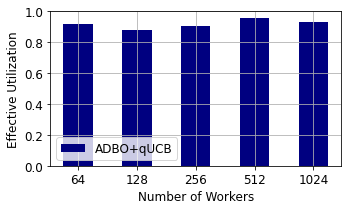

In [31]:
y = [0.92, 0.881, 0.906, 0.954, 0.928]
x = [(16*4)*(2**i) for i in range(len(y))]

N = 5
ind = np.arange(N) 
width = 0.5
  
xvals = y_base
bar1 = plt.bar(ind+width, y, width, color = 'navy')
  
plt.xlabel("Number of Workers")
plt.ylabel("Effective Utilization")
  
plt.xticks(ind+width,x)
plt.legend((bar1,), ('ADBO+qUCB',), loc="lower left")
plt.grid()
plt.tight_layout()
plt.savefig("scaling-utilization.pdf")
plt.show()

In [25]:
from deephyper.problem import HpProblem

hp_problem = HpProblem()

# Model hyperparameters
ACTIVATIONS = [
    "elu",
    "gelu",
    "hard_sigmoid",
    "linear",
    "relu",
    "selu",
    "sigmoid",
    "softplus",
    "softsign",
    "swish",
    "tanh",
]
default_dense = [1000, 1000, 1000]
default_dense_feature_layers = [1000, 1000, 1000]

for i in range(len(default_dense)):

    hp_problem.add_hyperparameter(
        (10, 1024, "log-uniform"),
        f"dense_{i}",
        default_value=default_dense[i],
    )

    hp_problem.add_hyperparameter(
        (10, 1024, "log-uniform"),
        f"dense_feature_layers_{i}",
        default_value=default_dense_feature_layers[i],
    )

hp_problem.add_hyperparameter(ACTIVATIONS, "activation", default_value="relu")

# Optimization hyperparameters
hp_problem.add_hyperparameter(
    [
        "sgd",
        "rmsprop",
        "adagrad",
        "adadelta",
        "adam",
    ],
    "optimizer",
    default_value="sgd",
)

hp_problem.add_hyperparameter((0, 0.5), "dropout", default_value=0.0)
hp_problem.add_hyperparameter((8, 512, "log-uniform"), "batch_size", default_value=32)

hp_problem.add_hyperparameter(
    (1e-5, 1e-2, "log-uniform"), "learning_rate", default_value=0.001
)
hp_problem.add_hyperparameter(
    (1e-5, 1e-2, "log-uniform"), "base_lr", default_value=0.001
)
hp_problem.add_hyperparameter([True, False], "residual", default_value=False)

hp_problem.add_hyperparameter([True, False], "early_stopping", default_value=False)
hp_problem.add_hyperparameter((5, 20), "early_stopping_patience", default_value=5)

hp_problem.add_hyperparameter([True, False], "reduce_lr", default_value=False)
hp_problem.add_hyperparameter((0.1, 1.0), "reduce_lr_factor", default_value=0.5)
hp_problem.add_hyperparameter((5, 20), "reduce_lr_patience", default_value=5)

hp_problem.add_hyperparameter([True, False], "warmup_lr", default_value=False)
hp_problem.add_hyperparameter([True, False], "batch_normalization", default_value=False)

hp_problem.add_hyperparameter(
    ["mse", "mae", "logcosh", "mape", "msle", "huber"], "loss", default_value="mse"
)

hp_problem.add_hyperparameter(
    ["std", "minmax", "maxabs"], "scaling", default_value="std"
)

scaling, Type: Categorical, Choices: {std, minmax, maxabs}, Default: std

In [26]:
hp_problem

Configuration space object:
  Hyperparameters:
    activation, Type: Categorical, Choices: {elu, gelu, hard_sigmoid, linear, relu, selu, sigmoid, softplus, softsign, swish, tanh}, Default: relu
    base_lr, Type: UniformFloat, Range: [1e-05, 0.01], Default: 0.001, on log-scale
    batch_normalization, Type: Categorical, Choices: {True, False}, Default: False
    batch_size, Type: UniformInteger, Range: [8, 512], Default: 32, on log-scale
    dense_0, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_1, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_2, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_feature_layers_0, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_feature_layers_1, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_feature_layers_2, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dropout, Type: Un

In [28]:
len(hp_problem.hyperparameter_names)

22

In [32]:
np.mean(y)

0.9178000000000001